In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

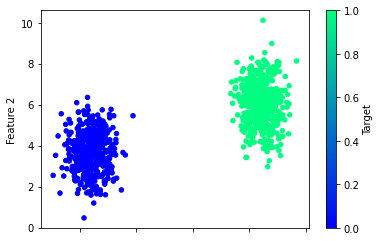

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()


In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.8027
Epoch 2/100
24/24 [==============================] - 0s 870us/step - loss: 0.6900 - accuracy: 0.5020
Epoch 3/100
24/24 [==============================] - 0s 830us/step - loss: 0.6869 - accuracy: 0.5002
Epoch 4/100
24/24 [==============================] - 0s 873us/step - loss: 0.6824 - accuracy: 0.4987
Epoch 5/100
24/24 [==============================] - 0s 852us/step - loss: 0.6755 - accuracy: 0.5246
Epoch 6/100
24/24 [==============================] - 0s 786us/step - loss: 0.6685 - accuracy: 0.4940
Epoch 7/100
24/24 [==============================] - 0s 859us/step - loss: 0.6578 - accuracy: 0.5107
Epoch 8/100
24/24 [==============================] - 0s 965us/step - loss: 0.6460 - accuracy: 0.6925
Epoch 9/100
24/24 [==============================] - 0s 823us/step - loss: 0.6371 - accuracy: 0.9826
Epoch 10/100
24/24 [==============================] - 0s 816us/step - loss: 0.6247 - accuracy

24/24 [==============================] - 0s 786us/step - loss: 0.1077 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 839us/step - loss: 0.1059 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 782us/step - loss: 0.1073 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 799us/step - loss: 0.1010 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 758us/step - loss: 0.1011 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 815us/step - loss: 0.0994 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 823us/step - loss: 0.0962 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 859us/step - loss: 0.1014 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 907us/step - loss: 0.0987 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 919us/step - loss: 0.0921 - accuracy: 

<AxesSubplot:>

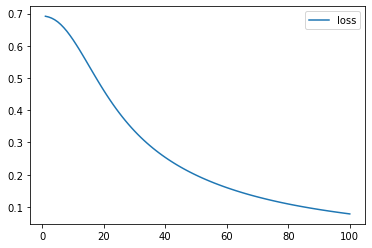

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

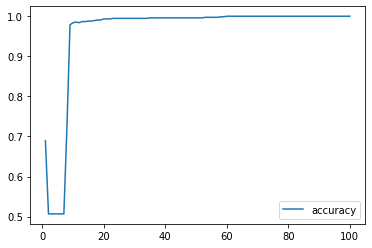

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8/8 - 0s - loss: 0.0793 - accuracy: 1.0000
Loss: 0.0793256163597107, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

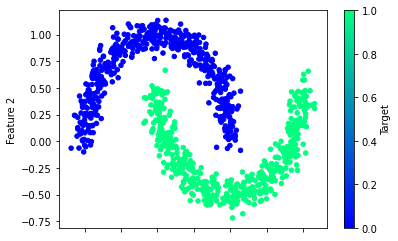

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0242 - accuracy: 0.4827
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9140 - accuracy: 0.5053
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8392 - accuracy: 0.5213
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7853 - accuracy: 0.5280
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7458 - accuracy: 0.5387
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.5507
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5667
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.5760
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.5853
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.5947
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.8733
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.8760
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.8773
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8773
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8787
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8787
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8787
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.8800
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2732 - accuracy: 0.8813
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.8813
Epoch 93/100


<AxesSubplot:>

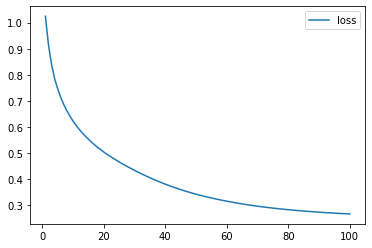

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

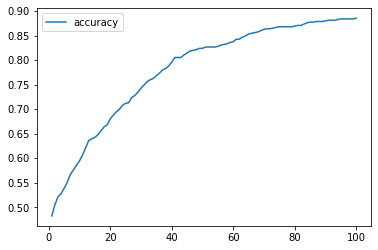

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()


In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 953us/step - loss: 0.7922 - accuracy: 0.4590
Epoch 2/100
24/24 [==============================] - 0s 753us/step - loss: 0.7369 - accuracy: 0.4885
Epoch 3/100
24/24 [==============================] - 0s 900us/step - loss: 0.7028 - accuracy: 0.4788
Epoch 4/100
24/24 [==============================] - 0s 795us/step - loss: 0.6674 - accuracy: 0.4737
Epoch 5/100
24/24 [==============================] - 0s 977us/step - loss: 0.6300 - accuracy: 0.5630
Epoch 6/100
24/24 [==============================] - 0s 922us/step - loss: 0.6107 - accuracy: 0.6870
Epoch 7/100
24/24 [==============================] - 0s 821us/step - loss: 0.5826 - accuracy: 0.7290
Epoch 8/100
24/24 [==============================] - 0s 868us/step - loss: 0.5477 - accuracy: 0.7958
Epoch 9/100
24/24 [==============================] - 0s 868us/step - loss: 0.5203 - accuracy: 0.8423
Epoch 10/100
24/24 [==============================] - 0s 974us/step - loss: 0.5006 - accura

24/24 [==============================] - 0s 791us/step - loss: 0.1927 - accuracy: 0.9193
Epoch 82/100
24/24 [==============================] - 0s 803us/step - loss: 0.2240 - accuracy: 0.9112
Epoch 83/100
24/24 [==============================] - 0s 852us/step - loss: 0.1886 - accuracy: 0.9216
Epoch 84/100
24/24 [==============================] - 0s 790us/step - loss: 0.2269 - accuracy: 0.9051
Epoch 85/100
24/24 [==============================] - 0s 819us/step - loss: 0.2315 - accuracy: 0.8955
Epoch 86/100
24/24 [==============================] - 0s 846us/step - loss: 0.2344 - accuracy: 0.9010
Epoch 87/100
24/24 [==============================] - 0s 771us/step - loss: 0.2351 - accuracy: 0.8979
Epoch 88/100
24/24 [==============================] - 0s 848us/step - loss: 0.2402 - accuracy: 0.8885
Epoch 89/100
24/24 [==============================] - 0s 896us/step - loss: 0.1931 - accuracy: 0.9149
Epoch 90/100
24/24 [==============================] - 0s 814us/step - loss: 0.1972 - accuracy: 